# Task 4 - Exploratory Data Analysis - Terrorism

## THE SPARKS FOUNDATION
### GRADUATE ROTATIONAL INTERNSHIP PROGRAM GRIPMAR21
### DATA SCIENCE AND BUSINESS ANALYTICS


### Author: Abdullah Ficici

**Business context.** As a security/defense analyst, try to find out the hot zone of terrorism.

**Problem statement.** What all security issues and insights you can derive by EDA?

**Analytical context.** Exploratory Data Analysis. 

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Read The Data

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
pd.DataFrame(df.isnull().sum())

,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,172452
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


### Find the Missing Values and Drop the Columns

In [10]:
print('Number of missing values in the "approxdate" column: ', df['approxdate'].isnull().sum())

Number of missing values in the "approxdate" column:  172452


In [11]:
print('Number of missing values in the "related" column: ', df['related'].isnull().sum())

Number of missing values in the "related" column:  156653


In [12]:
df.drop(columns=['approxdate', 'related'], inplace=True)

In [13]:
pd.DataFrame(df.columns)

,0
0,eventid
1,iyear
2,imonth
3,iday
4,extended
...,...
128,dbsource
129,INT_LOG
130,INT_IDEO
131,INT_MISC


In [14]:
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0]).astype('float64')

### Correlation

In [15]:
corr = df.corr()
corr

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.955888,0.034361,0.025062,0.092043,-0.107862,0.386987,0.157509,0.003507,0.028866,...,-0.014864,-0.052527,-0.000733,-0.116674,0.199311,-0.157749,-0.098703,-0.087317,-0.066077,-0.129521
iyear,0.955888,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.034361,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.025062,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.092043,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.157749,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.098703,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.087317,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.066077,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


### Correlation Heatmap

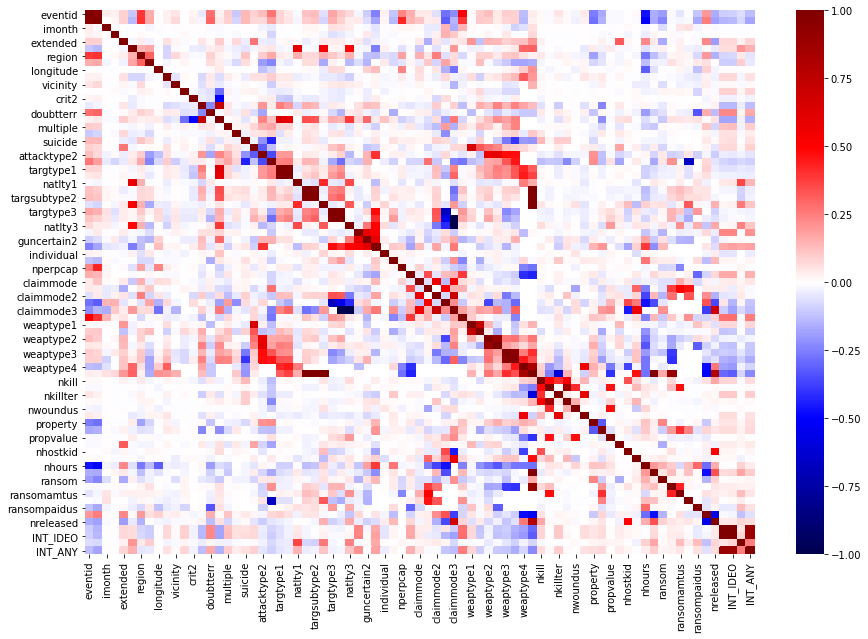

In [16]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='seismic') 
plt.show() 

### Where are the Hot Zones - Top 10 Countries?

In [17]:
df['country_txt'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

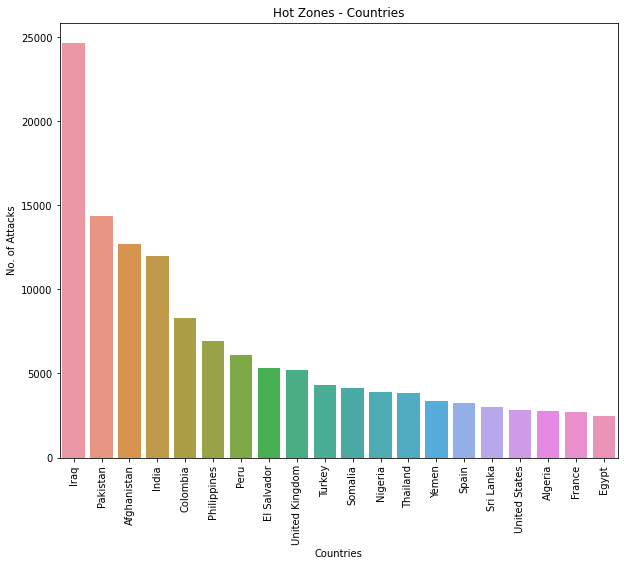

In [18]:
df['country_txt'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=df['country_txt'].value_counts()[:20].index,y=df['country_txt'].value_counts()[:20].values)
plt.title('Hot Zones - Countries')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('No. of Attacks')
plt.show()

### Where are the Safe Zones - Top 10 Countries?

In [19]:
df['country_txt'].value_counts().tail(10)

Falkland Islands       1
St. Lucia              1
International          1
Wallis and Futuna      1
New Hebrides           1
Andorra                1
North Korea            1
Antigua and Barbuda    1
South Vietnam          1
Vatican City           1
Name: country_txt, dtype: int64

### Where are the Hot Zones - Region?

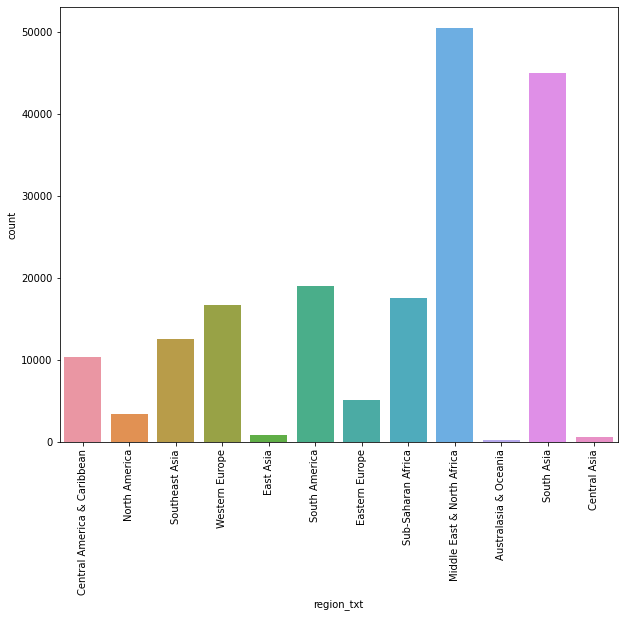

In [20]:
df['region_txt'].value_counts()
plt.figure(figsize=(10,8))
sns.countplot(x='region_txt',data=df)
plt.xticks(rotation=90)
plt.show()

In [21]:
df['region_txt'].value_counts().idxmax()

'Middle East & North Africa'

### Where are the Safe Zones - Region?

In [22]:
df['region_txt'].value_counts().idxmin()

'Australasia & Oceania'

### Where are the Hot Zones - Cities?

In [23]:
df['city'].value_counts()

Unknown                   9775
Baghdad                   7589
Karachi                   2652
Lima                      2359
Mosul                     2265
                          ... 
Wii-Anaka                    1
Malar                        1
Kalapo                       1
Ancona                       1
Abu al Khasib district       1
Name: city, Length: 36674, dtype: int64

In [24]:
df= df[df['city'] != 'Unknown'] 

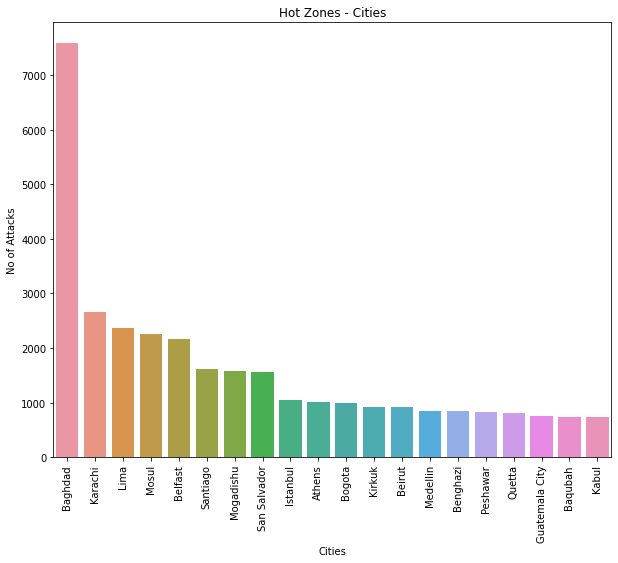

In [25]:
df['city'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=df['city'].value_counts()[:20].index,y=df['city'].value_counts()[:20].values)
plt.title('Hot Zones - Cities')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('No of Attacks')
plt.show()

### Terror Attacks 1970 - 2017

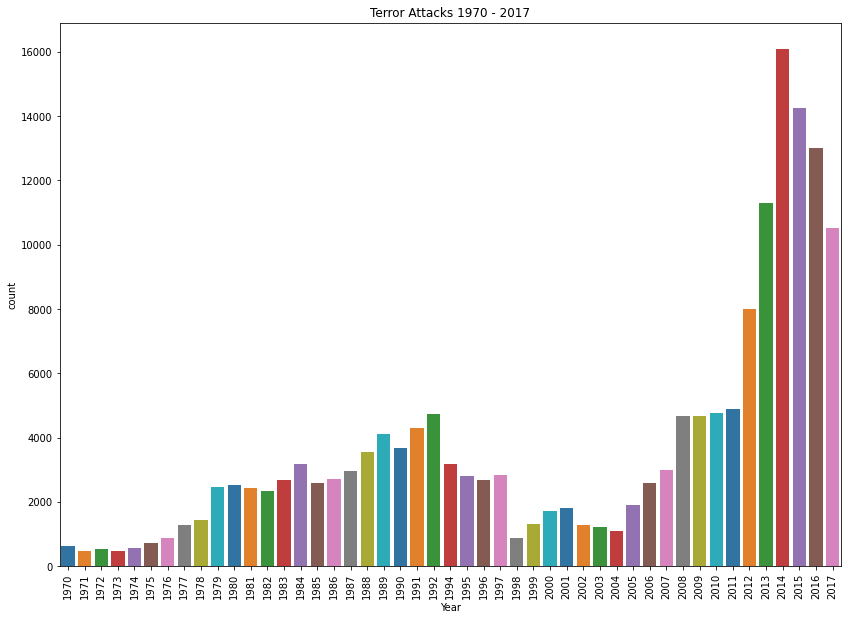

In [30]:
plt.subplots(figsize=(14,10))
sns.countplot(x='iyear',data=df,palette='tab10')
plt.xticks(rotation=90)
plt.title('Terror Attacks 1970 - 2017')
plt.xlabel('Year')
plt.show()

### Number of Attacks vs. Attack Type

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['attacktype1_txt'],order=df['attacktype1_txt'].value_counts().index,palette='tab10')
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.show()

In [39]:
df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]
df

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,0.0,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1.0,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
3,3.0,1970,1,0,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,4.0,1970,1,0,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
5,5.0,1970,1,1,0,NaN,217,United States,1,North America,...,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,181686.0,2017,12,31,0,NaN,182,Somalia,11,Sub-Saharan Africa,...,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,181687.0,2017,12,31,0,NaN,200,Syria,10,Middle East & North Africa,...,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,181688.0,2017,12,31,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,181689.0,2017,12,31,0,NaN,92,India,6,South Asia,...,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9
